## Read Data From Dataset

In [1]:
import pandas as pd
data = pd.read_csv('data_2005-2019.csv', error_bad_lines=False, usecols = ['Description of incident','Type of breach']).drop_duplicates('Description of incident', keep='last')
data = data[pd.notnull(data['Description of incident'])]
data_text = data[['Description of incident']]
data_text['index'] = data_text.index
documents = data_text

In [2]:
print(data[:10].to_latex())

\begin{tabular}{lll}
\toprule
{} & Type of breach &                            Description of incident \\
\midrule
72 &           HACK &  The Kansas Department for Aging and Disability... \\
73 &           HACK &  According to a filing the company left with th... \\
75 &           HACK &  Information on this security breach is provide... \\
76 &           DISC &  The Sacramento Bee said in a statement that a ... \\
77 &           HACK &  A data breach at the University of Alaska has ... \\
78 &           HACK &  Under Armour says roughly 150 million MyFitnes... \\
79 &           DISC &  On Mar 30, researchers at Kromtech Security id... \\
80 &           HACK &  Hackers have stolen the personal and financial... \\
81 &           DISC &  KrebsOnSecurity has discovered that Panera Bre... \\
82 &           HACK &  Delta now says that payment-card information f... \\
\bottomrule
\end{tabular}



In [3]:
print(len(data))
print(data[:5])

5749
   Type of breach                            Description of incident
72           HACK  The Kansas Department for Aging and Disability...
73           HACK  According to a filing the company left with th...
75           HACK  Information on this security breach is provide...
76           DISC  The Sacramento Bee said in a statement that a ...
77           HACK  A data breach at the University of Alaska has ...


In [5]:
print(data.head().to_latex())

\begin{tabular}{lll}
\toprule
{} & Type of breach &                            Description of incident \\
\midrule
72 &           HACK &  The Kansas Department for Aging and Disability... \\
73 &           HACK &  According to a filing the company left with th... \\
75 &           HACK &  Information on this security breach is provide... \\
76 &           DISC &  The Sacramento Bee said in a statement that a ... \\
77 &           HACK &  A data breach at the University of Alaska has ... \\
\bottomrule
\end{tabular}



In [6]:
print(documents.head().to_latex())

\begin{tabular}{llr}
\toprule
{} &                            Description of incident &  index \\
\midrule
72 &  The Kansas Department for Aging and Disability... &     72 \\
73 &  According to a filing the company left with th... &     73 \\
75 &  Information on this security breach is provide... &     75 \\
76 &  The Sacramento Bee said in a statement that a ... &     76 \\
77 &  A data breach at the University of Alaska has ... &     77 \\
\bottomrule
\end{tabular}



In [7]:
print(len(documents))
print(documents[:5])

5749
                              Description of incident  index
72  The Kansas Department for Aging and Disability...     72
73  According to a filing the company left with th...     73
75  Information on this security breach is provide...     75
76  The Sacramento Bee said in a statement that a ...     76
77  A data breach at the University of Alaska has ...     77


## Dataset Preprocessing

In [8]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')
stemmer = SnowballStemmer('english')
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Priyanka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
doc_sample = documents[documents['index'] == 100].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['The', 'athletic-wear', 'company', 'alerted', 'customers', 'on', 'Thursday', 'about', 'a', 'possible', 'data', 'breach', 'on', 'its', 'U.S.', 'website.', 'A', 'preliminary', 'investigation', 'found', 'the', 'leaked', 'data', 'includes', 'contact', 'information,', 'usernames', 'and', 'encrypted', 'passwords,', 'the', 'company', 'said', 'in', 'a', 'statement.', 'Adidas', 'said', 'it', 'does', 'not', 'believe', 'any', 'credit', 'card', 'or', 'health', 'and', 'fitness', 'information', 'was', 'compromised.“We', 'are', 'alerting', 'certain', 'consumers', 'who', 'purchased', 'on', 'adidas.com/US', 'about', 'a', 'potential', 'data', 'security', 'incident.', 'At', 'this', 'time', 'this', 'is', 'a', 'few', 'million', 'consumers,”', 'a', 'spokeswoman', 'said', 'in', 'an', 'email.\xa0']


 tokenized and lemmatized document: 
['athlet', 'wear', 'compani', 'alert', 'custom', 'thursday', 'possibl', 'data', 'breach', 'websit', 'preliminari', 'investig', 'leak', 'data', 'includ', '

In [10]:
documents['Description of incident'][100]

'The athletic-wear company alerted customers on Thursday about a possible data breach on its U.S. website. A preliminary investigation found the leaked data includes contact information, usernames and encrypted passwords, the company said in a statement. Adidas said it does not believe any credit card or health and fitness information was compromised.“We are alerting certain consumers who purchased on adidas.com/US about a potential data security incident. At this time this is a few million consumers,” a spokeswoman said in an email.\xa0'

In [11]:
processed_docs = documents['Description of incident'].map(preprocess)
processed_docs[:10]

72    [kansa, depart, age, disabl, servic, kdad, beg...
73    [accord, file, compani, leav, chegg, technolog...
75    [inform, secur, breach, provid, offic, indiana...
76    [sacramento, say, statement, firewal, protect,...
77    [data, breach, univers, alaska, impact, dozen,...
78    [armour, say, rough, million, myfitnessp, user...
79    [research, kromtech, secur, identifi, databas,...
80    [hacker, steal, person, financi, inform, custo...
81    [krebsonsecur, discov, panera, bread, leav, mi...
82    [delta, say, payment, card, inform, thousand, ...
Name: Description of incident, dtype: object

In [12]:
processed_docs[50:70]

123    [februari, kinet, receiv, notic, inadvert, dat...
124    [public, record, request, employe, payrol, inf...
125    [intuit, suffer, data, breach, affect, record,...
126    [januari, aperio, group, parti, invest, manag,...
127    [perri, associ, recent, learn, malwar, deploy,...
128    [februari, central, islip, union, free, school...
129    [februari, eastern, shore, begin, receiv, repo...
130    [center, employe, process, order, phone, illeg...
131    [medic, scienc, comput, suffer, breach, affect...
132    [suffer, breach, affect, record, acquir, infor...
133    [cleric, mistak, lead, includ, separ, envelop,...
134    [princip, receiv, pension, death, benefit, cla...
135    [engl, martin, associ, suffer, breach, affect,...
136    [thoma, edison, state, univers, discov, unauth...
137    [januari, palo, alto, unifi, school, district,...
139    [social, secur, number, employe, visibl, windo...
140    [lendkey, technolog, suffer, breach, affect, r...
141    [saint, loui, trust, com

## Calculate Bag of Words

In [13]:
# calculate bow corpus for a text
def bowcorpus(textArray):
    preprocesstext = [preprocess(text) for text in textArray]
    dictionary = gensim.corpora.Dictionary(preprocesstext)
    dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
    return [dictionary.doc2bow(doc) for doc in preprocesstext], dictionary

In [14]:
bow_corpus, dictionary = bowcorpus(documents['Description of incident'])
bow_corpus[200]

[(1, 1),
 (4, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (10, 1),
 (24, 5),
 (36, 2),
 (38, 2),
 (45, 1),
 (51, 1),
 (54, 1),
 (55, 1),
 (58, 1),
 (60, 1),
 (69, 2),
 (76, 1),
 (86, 1),
 (87, 3),
 (88, 2),
 (113, 3),
 (129, 3),
 (134, 2),
 (140, 1),
 (153, 1),
 (178, 1),
 (198, 1),
 (225, 1),
 (231, 2),
 (252, 1),
 (262, 1),
 (272, 1),
 (275, 1),
 (277, 1),
 (290, 1),
 (306, 1),
 (322, 1),
 (328, 1),
 (339, 2),
 (354, 2),
 (360, 1),
 (418, 1),
 (449, 1),
 (488, 1),
 (580, 1),
 (596, 2),
 (619, 1),
 (620, 1),
 (640, 1),
 (667, 1),
 (697, 1),
 (715, 1),
 (810, 1),
 (844, 1),
 (845, 1),
 (916, 1)]

In [ ]:
## LDA Topic models as a classification vector

import warnings
import logging # This allows for seeing if the model converges. A log file is created.
logging.basicConfig(filename='lda_model.log', format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    lda_train = gensim.models.ldamulticore.LdaMulticore(
                           corpus=bow_corpus,
                           num_topics=20,
                           id2word=dictionary,
                           chunksize=100,
                           workers=7, # Num. Processing Cores - 1
                           passes=50,
                           eval_every = 1,
                           per_word_topics=True)
    lda_train.save('lda_train.model')

In [16]:
import warnings
import logging # This allows for seeing if the model converges. A log file is created.
logging.basicConfig(filename='lda_model.log', format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    lda_train = gensim.models.ldamulticore.LdaMulticore(
                           corpus=bow_corpus,
                           num_topics=20,
                           id2word=dictionary,
                           chunksize=100,
                           workers=7, # Num. Processing Cores - 1
                           passes=50,
                           eval_every = 1,
                           per_word_topics=True)
    lda_train.save('lda_train.model')

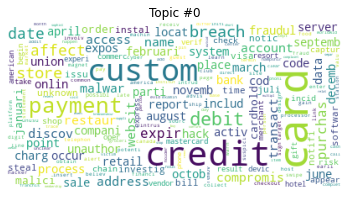

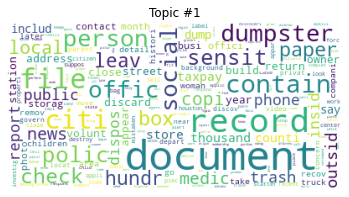

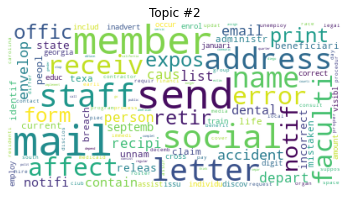

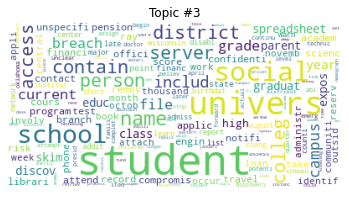

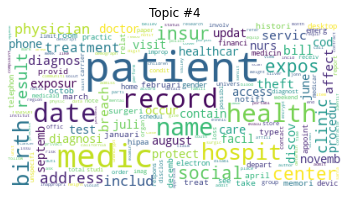

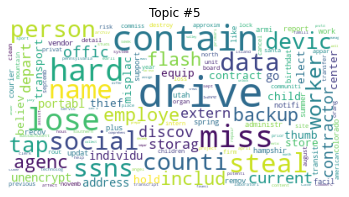

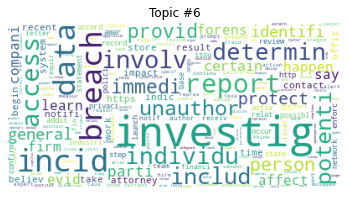

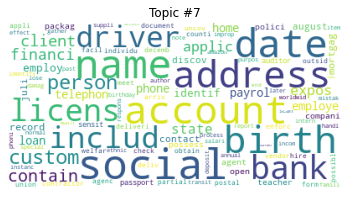

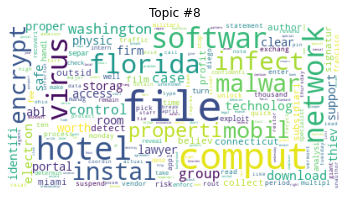

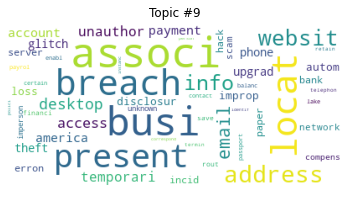

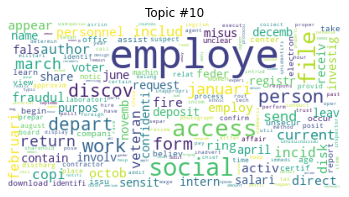

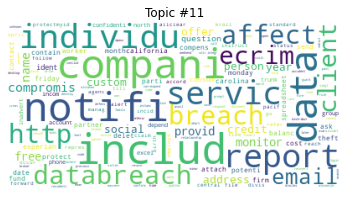

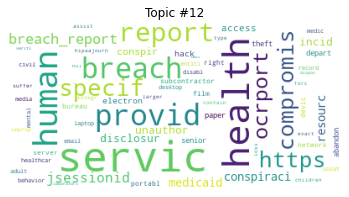

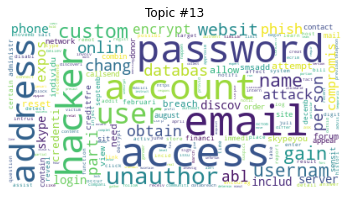

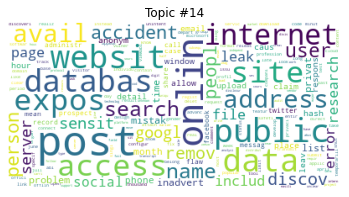

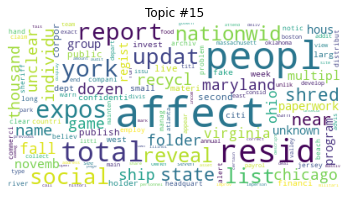

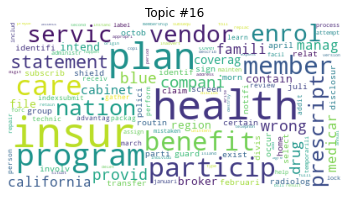

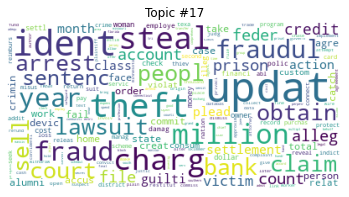

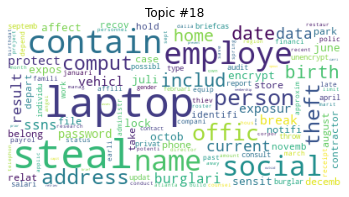

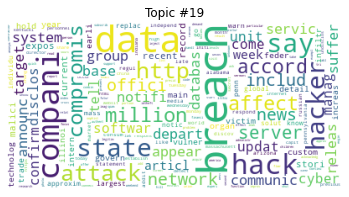

In [17]:
# lda is assumed to be the variable holding the LdaModel object
from gensim import corpora, models, similarities
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
lda_train =  models.LdaModel.load('lda_train.model')
for t in range(lda_train.num_topics):
    plt.figure()
    plt.imshow(WordCloud(background_color='white',
                      max_font_size = 50).fit_words(dict(lda_train.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

In [18]:
lda_train.print_topics(20,num_words=15)[:20]

[(0,
  '0.143*"card" + 0.094*"credit" + 0.075*"custom" + 0.032*"payment" + 0.023*"debit" + 0.017*"store" + 0.016*"breach" + 0.015*"affect" + 0.015*"date" + 0.012*"expir" + 0.012*"purchas" + 0.011*"compromis" + 0.011*"name" + 0.010*"address" + 0.010*"access"'),
 (1,
  '0.078*"document" + 0.050*"record" + 0.032*"file" + 0.030*"citi" + 0.026*"contain" + 0.023*"social" + 0.022*"dumpster" + 0.021*"person" + 0.021*"offic" + 0.018*"polic" + 0.018*"sensit" + 0.016*"check" + 0.015*"box" + 0.015*"paper" + 0.014*"leav"'),
 (2,
  '0.074*"mail" + 0.071*"send" + 0.066*"member" + 0.046*"social" + 0.040*"staff" + 0.037*"letter" + 0.035*"address" + 0.031*"name" + 0.027*"receiv" + 0.026*"faculti" + 0.024*"affect" + 0.023*"error" + 0.019*"notif" + 0.015*"retir" + 0.015*"print"'),
 (3,
  '0.159*"student" + 0.081*"univers" + 0.057*"social" + 0.051*"school" + 0.032*"name" + 0.028*"contain" + 0.027*"district" + 0.027*"person" + 0.026*"server" + 0.025*"colleg" + 0.022*"access" + 0.019*"includ" + 0.016*"campus

## TF-IDF Feature Vector calculation

In [20]:
from sklearn import preprocessing 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
# tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
tfidf = TfidfVectorizer()
features = tfidf.fit_transform(documents['Description of incident']).toarray()
pickle.dump(tfidf, open("tfidf.pickle", "wb"))
features.shape

(5749, 15076)

## LDA Feature Vector Calculation

In [21]:
def ldaVecs(docs, corpus, ldaModel):
    train_vecs = []
    for i in range(len(docs)):
        top_topics = ldaModel.get_document_topics(corpus[i], minimum_probability=0.0)
        topic_vec = [top_topics[i][1] for i in range(20)]
        train_vecs.append(topic_vec)
    return train_vecs

In [22]:
lda_vecs = ldaVecs(documents['Description of incident'], bow_corpus, lda_train)

In [23]:
import numpy as np
from scipy import sparse
sparse_lda =sparse.csr_matrix(lda_vecs)

sparse_lda.shape

(5749, 20)

In [24]:
combine_vecs = sparse.hstack((features, sparse_lda))
combine_vecs.shape

(5749, 15096)

In [28]:
tfidf_vecs = sparse.csr_matrix(features)
tfidf_vecs.shape
combine_vecs = sparse.hstack((tfidf_vecs, sparse_lda))
combine_vecs.shape

(5749, 15096)

## Data Balancing using SMOTE

In [32]:
from imblearn.over_sampling import SMOTE
from collections import Counter
labels = data['Type of breach']
# Define SMOTE model and specify minority class for oversample
smote = SMOTE(sampling_strategy='minority')
# summarize class distribution
counter = Counter(labels)
print(counter)
# # Fit data
# X_smote, y_smote = smote.fit_sample(combine_vecs, labels)
# # Plot
# draw_plot(X_smote, y_smote, 'SMOTE’)

Counter({'HACK': 1942, 'PORT': 1161, 'DISC': 1082, 'PHYS': 642, 'INSD': 605, 'STAT': 249, 'CARD': 68})


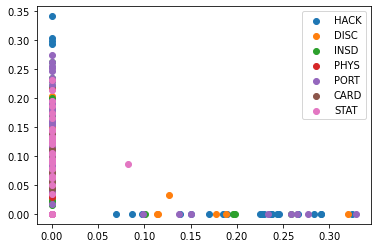

In [33]:
import matplotlib.pyplot as plt 
from numpy import where
from imblearn.over_sampling import SMOTE
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(labels == label)[0]
    plt.scatter(features[row_ix, 0], features[row_ix, 1], label=str(label))
plt.legend()
plt.show()

Counter({'HACK': 1942, 'DISC': 1942, 'INSD': 1942, 'PHYS': 1942, 'PORT': 1942, 'CARD': 1942, 'STAT': 1942})


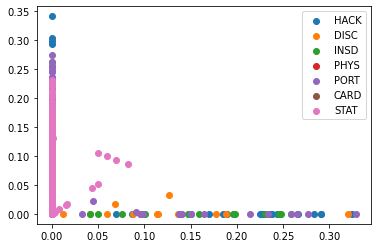

In [34]:
oversample = SMOTE()
X, y = oversample.fit_resample(features, labels)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

## Train Model using Train-Test(0.7/0.3) Approach

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
labels = data['Type of breach']
models = [
    RandomForestClassifier(n_estimators=1000, class_weight='balanced'),
    LinearSVC(dual=False, max_iter=10000),
    MultinomialNB(),
    LogisticRegression(n_jobs=-1, C=1e5, max_iter=10000)
]
def train_test(X, y): 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42, shuffle = True, stratify = y)
#     X_train, y_train = smote.fit_resample(X_train, y_train)

    entries = []
    targets = data['Type of breach'].unique()
    for model in models:
      model_name = model.__class__.__name__
      model.fit(X_train, y_train)
      y_predict = model.predict(X_test)
      accuracy = accuracy_score(y_predict, y_test)
      f1score = f1_score(y_predict, y_test,average='macro')
      entries.append((model_name, accuracy, f1score))
    train_test_split_df = pd.DataFrame(entries, columns=['model_name', 'accuracy','f1score'])
    print(train_test_split_df.groupby('model_name').head())

In [40]:
train_test(tfidf_vecs, labels)

               model_name  accuracy   f1score
0  RandomForestClassifier  0.773333  0.573998
1               LinearSVC  0.850435  0.759375
2           MultinomialNB  0.570435  0.321323
3      LogisticRegression  0.795942  0.714062


In [39]:
train_test(lda_vecs, labels)

               model_name  accuracy   f1score
0  RandomForestClassifier  0.708986  0.505585
1               LinearSVC  0.707826  0.494918
2           MultinomialNB  0.607536  0.363624
3      LogisticRegression  0.715942  0.517451


In [64]:
train_test(combine_vecs, labels)

               model_name  accuracy   f1score
0  RandomForestClassifier  0.784348  0.582726
1               LinearSVC  0.845217  0.753091
2           MultinomialNB  0.612174  0.371887
3      LogisticRegression  0.804058  0.720556


## Train Model using K-Fold(K=10) Approach

In [55]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
def crossvalidate(X, y):
    entries = []
    CV = StratifiedKFold(n_splits=10)
    entries = []
    scoring = ['accuracy', 'f1_macro']
    for model in models:
      model_name = model.__class__.__name__
      imba_pipeline = make_pipeline(smote, model)
      scores = cross_validate(model, X, y, scoring=scoring, cv=CV, n_jobs=-1,return_train_score=False )
      entries.append((model_name, scores['test_accuracy'].mean(), scores['test_f1_macro'].mean()))
    return pd.DataFrame(entries, columns=['model_name', 'accuracy','f1score'])
#     print(cv_df.groupby('model_name').head())

In [44]:
cv_df = crossvalidate(tfidf_vecs, labels)
print(cv_df.groupby('model_name').head())

               model_name  accuracy   f1score
0  RandomForestClassifier  0.724827  0.529932
1               LinearSVC  0.820151  0.749434
2           MultinomialNB  0.570542  0.327150
3      LogisticRegression  0.754390  0.684612


In [47]:
cv_df = crossvalidate(lda_vecs, labels)
print(cv_df.groupby('model_name').head())

               model_name  accuracy   f1score
0  RandomForestClassifier  0.688114  0.504748
1               LinearSVC  0.684464  0.474991
2           MultinomialNB  0.581497  0.340136
3      LogisticRegression  0.689854  0.496837


In [56]:
cv_df = crossvalidate(combine_vecs, labels)
print(cv_df.groupby('model_name').head())

               model_name  accuracy   f1score
0  RandomForestClassifier  0.727611  0.531380
1               LinearSVC  0.817364  0.734999
2           MultinomialNB  0.610725  0.373388
3      LogisticRegression  0.768830  0.682131


## Store the best model

In [66]:
import pickle

#
# Create your model here (same as above)
#

# Save to file in the current working directory
pkl_filename = "best_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(models[1], file)

## Test Prediction

In [67]:
import pickle

#
# Create your model here (same as above)
#

# Save to file in the current working directory
pkl_filename = "best_model.pkl"
# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
pickle_model

LinearSVC(dual=False, max_iter=10000)

In [68]:
def getVectors(testData):
    tfidfVectorizer = pickle.load(open("tfidf.pickle", "rb"))
    tfidfVectors = tfidfVectorizer.transform(testData)
    # get lda train model
    lda_train =  gensim.models.LdaModel.load('lda_train.model')
    ldaVectors = ldaVecs(testData, bow_corpus, lda_train)
    sparse_lda =sparse.csr_matrix(ldaVectors)
    return sparse.hstack((tfidfVectors, sparse_lda))

In [69]:
def predict(testData):
    pkl_filename = "best_model.pkl"
    # Load from file
    with open(pkl_filename, 'rb') as file:
        pickle_model = pickle.load(file)
        
    testVectors = getVectors(testData)
    return pickle_model.predict(testVectors)

In [70]:
prediction = predict(["Hackers have stolen the personal and financial information of customers who shop at Lord and Taylor and Saks Fifth Avenue in the latest of a string of data breaches in recent years.Records for more than five million credit and debit cards used at all the chainsâ€™ North American locations were compromised, according to Gemini Advisory, a cybersecurity firm. Most were obtained from stores in New York and New Jersey, Gemini said."])
print(prediction)

['HACK']
